## Setting up: Install required packages

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from pandas.plotting import radviz
from sklearn.metrics import confusion_matrix
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
import os

## Collect data sets

In [4]:
df_raw = pd.read_csv('C:\\Users\\Jishan\\Desktop\\CS6010\\hcc-survival\\hcc-data.txt')

### Add headers

In [5]:
columns_m = ['gender','symptoms','alcohol','hepatitis b surface antigen','hepatitis b e antigen','hepatitis b core antibody',  'hepatitis c virus antibody','cirrhosis','endemic countries','smoking','diabetes','obesity','hemochromatosis','arterial hypertension','chronic renal insufficiency','human immunodeficiency virus','nonalcoholic steatohepatitis','esophageal varices','splenomegaly','portal hypertension','portal vein thrombosis','liver metastasis','radiological hallmark', 'age', 'grams of alcohol per day','packs of cigarettes per year','performance status','encephalopathy degree','ascites degree','international normalized ratio','alpha-fetoprotein','hemoglobin','mean corpuscular volume','leukocytes','platelets','albumin','total bilirubin','alanine transaminase','aspartate transaminase','gamma glutamyl transferase','alkaline phosphatase','total proteins','creatinine','number of nodules','major dimension of nodule cm','direct bilirubin mg/dL','iron','oxygen saturation %','ferritin','class_attribute']

In [6]:
df= pd.read_csv('./hcc-data.txt',names=columns_m)

In [7]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


### Data Set 1( Impute missing values using mean strategy)

In [32]:
imp_mean = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True)
imp_mean.fit(df.values)
mat = imp_mean.transform(df.values)
df1 = pd.DataFrame(mat, columns=df.columns)


### Data set 2(Impute missing values using median strategy)

In [11]:
imp_median = SimpleImputer(strategy='median', missing_values=np.nan, copy=True)
imp_median.fit(df.values)
mat_median = imp_median.transform(df.values)
df2 = pd.DataFrame(mat_median, columns=df.columns)


### Data Set 3 (Impute missing values using most frequent strategy)

In [12]:
imp_mf = SimpleImputer(strategy='most_frequent', missing_values=np.nan, copy=True)
#imp_sb = SimpleImputer(strategy='most_frequent', missing_values='', copy=True)
imp_mf.fit(df.values)
mat_mf = imp_mf.transform(df.values)
df3 = pd.DataFrame(mat_mf, columns=df.columns)


### Data Set 4( Impute missing values using iterativeImputer strategy)

In [13]:
cols = df.columns
imputer = IterativeImputer()
df4 = pd.DataFrame(imputer.fit_transform(df))
df4.columns = df.columns
df4.index = df.index


## Design Logistic regression models

We have found that the response variable class_attribute is correlated with symptoms, performance status, ascites degree, hemoglobin, albumin, alkaline phosphatase, direct bilirubin mg/dL, iron, ferritin. Therefore, we will train our Logistic regression models using these 10 predictors. We will then compare the classification performances on four data sets that we have derived from missing values imputations. 


### Logistic regression for data( mean imputation) using StatsModels


In [14]:
cols=["symptoms","performance status","ascites degree","hemoglobin","albumin", "alkaline phosphatase", "direct bilirubin mg/dL","iron", "ferritin"] 
X_df1=df1[cols]
y_df1=df1['class_attribute']

In [15]:
logit_model_df1=sm.Logit(y_df1,X_df1)
result_df1=logit_model_df1.fit()
print(result_df1.summary2())

Optimization terminated successfully.
         Current function value: 0.489548
         Iterations 6
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.264     
Dependent Variable:    class_attribute   AIC:               179.5509  
Date:                  2019-10-18 23:23  BIC:               207.5044  
No. Observations:      165               Log-Likelihood:    -80.775   
Df Model:              8                 LL-Null:           -109.72   
Df Residuals:          156               LLR p-value:       1.2114e-09
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        6.0000                                         
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
symptoms               -0.6308   0.4546 -1.3873 0.1653 -1.5218  0.2603
per

## Interpretation: 

The smallest p-value here is associated with  iron, performance status, and ferritin. So there is no clear evidence of a real association between attribute class and other predicor variables. 


### Logistic regression for data( mean imputation) using  ScikitLearn 

In [16]:
logreg_df1 = LogisticRegression()
logreg_df1.fit(X_df1, y_df1)

C:\Users\Jishan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the traing set results and calculating the accuracy

In [17]:
y_pred_df1 = logreg_df1.predict(X_df1)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg_df1.score(X_df1, y_df1)))

Accuracy of logistic regression classifier on training set: 0.77


### Confusion matrix

In [18]:

confusion_matrix_df1 = confusion_matrix(y_df1, y_pred_df1)
print(confusion_matrix_df1)
print(type(confusion_matrix_df1))

[[39 24]
 [14 88]]
<class 'numpy.ndarray'>


Text(0.5, 15.0, 'Predicted label')

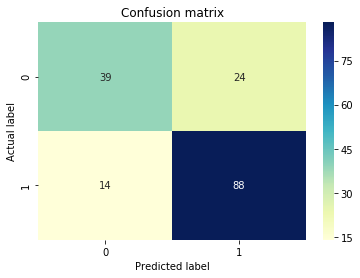

In [19]:
sns.heatmap(pd.DataFrame(confusion_matrix_df1), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Logistic regression for data( median imputation) using StatsModels

In [20]:
X_df2=df2[cols]
y_df2=df2['class_attribute']

In [21]:
logit_model_df2=sm.Logit(y_df2,X_df2)
result_df2=logit_model_df2.fit()
print(result_df2.summary2())

Optimization terminated successfully.
         Current function value: 0.485317
         Iterations 6
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.270     
Dependent Variable:    class_attribute   AIC:               178.1547  
Date:                  2019-10-18 23:23  BIC:               206.1082  
No. Observations:      165               Log-Likelihood:    -80.077   
Df Model:              8                 LL-Null:           -109.72   
Df Residuals:          156               LLR p-value:       6.4574e-10
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        6.0000                                         
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
symptoms               -0.4286   0.4415 -0.9707 0.3317 -1.2939  0.4368
per

### Logistic regression for data(most frequent strategy) using  ScikitLearn 

In [22]:
X_df3=df3[cols]
y_df3=df3['class_attribute']

In [23]:
logreg_df3 = LogisticRegression()
logreg_df3.fit(X_df3, y_df3)

C:\Users\Jishan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred_df3 = logreg_df3.predict(X_df3)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_df3.score(X_df3, y_df3)))

Accuracy of logistic regression classifier on test set: 0.77


In [25]:
confusion_matrix_df3 = confusion_matrix(y_df3, y_pred_df3)
print(confusion_matrix_df3)

[[37 26]
 [12 90]]


In [26]:
print(classification_report(y_df3, y_pred_df3))

              precision    recall  f1-score   support

         0.0       0.76      0.59      0.66        63
         1.0       0.78      0.88      0.83       102

    accuracy                           0.77       165
   macro avg       0.77      0.73      0.74       165
weighted avg       0.77      0.77      0.76       165



### Logistic regression for data(iterativeImputer) using  ScikitLearn 

In [27]:
X_df4=df4[cols]
y_df4=df4['class_attribute']

In [28]:
logreg_df4 = LogisticRegression()
logreg_df4.fit(X_df4, y_df4)

C:\Users\Jishan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred_df4 = logreg_df4.predict(X_df4)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_df4.score(X_df4, y_df4)))

Accuracy of logistic regression classifier on test set: 0.75


In [30]:
confusion_matrix_df4 = confusion_matrix(y_df4, y_pred_df4)
print(confusion_matrix_df4)

[[33 30]
 [12 90]]


In [31]:
print(classification_report(y_df4, y_pred_df4))

              precision    recall  f1-score   support

         0.0       0.73      0.52      0.61        63
         1.0       0.75      0.88      0.81       102

    accuracy                           0.75       165
   macro avg       0.74      0.70      0.71       165
weighted avg       0.74      0.75      0.73       165



 # Results and analysis:
    -----------------------------------------------------------------------------------
    | Datasets    | Logistic regression(StatsModels) | Logistic regression(ScikitLearn)|
    | ------------|--------------------------------- | --------------------------------|
    | Data set 1  | 0.0138                           | 0.77                            |
    | Data set 2  | 0.0052                           | 0.77                            |
    | Data set 3  | 0.0026                           | 0.77                            |
    | Data set 4  | 0.0303                           | 0.75                            |
    ------------------------------------------------------------------------------------
    
   From the above results, We see that  Logistic regression(StatsModels) performed well on the data with the median imputation to achieve lowest p-value. Logistic regression( ScikitLearn) has achieved almost same classification accuracy for all four data sets. Classification accuracy 77% indicates that our model performances were not satisfactory to classify survival and dead cases. We have used all sample data to train our model. Since models have already seen the data, our model should perform well to classify the response variable. I think, our predictors were not well associated with the response variable. It is also evident from the p-value. We can increase model performance by adopting different variable selection techniques like LASSO, and PCA.